In [1]:
__author__ = "730163077"

# Hypothesis  
## I predict that the number of deaths from ages 15-19 will be higher when the pupil-teacher ratio is high. 

### We will import necessary libraries and name necessary constants.

In [2]:
import pandas as pd
pupil_ratio: str = "SE.SEC.ENRL.TC.ZS"
death_15_19: str = "SH.DTH.1519"

### First, we will read in the csv file.

In [3]:
dataframe = pd.read_csv("../../data/databank_education_2018.csv")

### Now we will use the shape and head method for the dataframe.

In [4]:
print(dataframe.shape)
print(dataframe.head(10))

(244, 94)
               Country  SE.COM.DURS  SE.ENR.PRIM.FM.ZS  SE.ENR.PRSC.FM.ZS  \
0          Afghanistan          9.0            0.66691            0.63602   
1              Albania          9.0            1.03765            1.01730   
2              Algeria         10.0            0.95499                NaN   
3              Andorra         10.0                NaN                NaN   
4               Angola          6.0                NaN                NaN   
5  Antigua and Barbuda         11.0            0.99208            0.97924   
6           Arab World          9.0            0.94617            0.94833   
7            Argentina         14.0                NaN                NaN   
8              Armenia         12.0            0.99961            1.02283   
9                Aruba         13.0                NaN                NaN   

   SE.ENR.SECO.FM.ZS  SE.ENR.TERT.FM.ZS  SE.PRE.DURS  SE.PRE.ENRL.TC.ZS  \
0            0.57098            0.34523          1.0               

### Now we will narrow our columns to country, pupil-teacher ratio (secondary), and number of deaths from ages 15-19. 

In [5]:
ratio_and_death = dataframe[["Country", pupil_ratio, death_15_19]]

print(ratio_and_death.head(10))

               Country  SE.SEC.ENRL.TC.ZS  SH.DTH.1519
0          Afghanistan           33.50124      12310.0
1              Albania           11.19927         77.0
2              Algeria                NaN       1520.0
3              Andorra            8.01599          1.0
4               Angola                NaN       8620.0
5  Antigua and Barbuda            9.29704          4.0
6           Arab World           14.49976      46123.0
7            Argentina                NaN       2449.0
8              Armenia            8.01689         78.0
9                Aruba                NaN          NaN


### We will now only select rows with complete data.

In [6]:
ratio_and_death.dropna(inplace = True)

print(ratio_and_death.shape)
print(ratio_and_death.head(10))

(112, 3)
                Country  SE.SEC.ENRL.TC.ZS  SH.DTH.1519
0           Afghanistan           33.50124      12310.0
1               Albania           11.19927         77.0
3               Andorra            8.01599          1.0
5   Antigua and Barbuda            9.29704          4.0
6            Arab World           14.49976      46123.0
8               Armenia            8.01689         78.0
12           Azerbaijan            7.60984        344.0
13         Bahamas, The           12.48097         32.0
14              Bahrain           10.23948         33.0
15           Bangladesh           35.09524      20585.0
<ipython-input-6-4cede0ba5b76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_and_death.dropna(inplace = True)


### We will display the 10-largest values of the pupil-teacher ratio in secondary school in descending order.

In [7]:
df = ratio_and_death.sort_values(by = [pupil_ratio], ascending = False)
print(df.head(10))

                     Country  SE.SEC.ENRL.TC.ZS  SH.DTH.1519
137                   Malawi           72.31002       2975.0
15                Bangladesh           35.09524      20585.0
64                   Eritrea           35.02165        591.0
0                Afghanistan           33.50124      12310.0
100                    India           28.52287     103186.0
185                   Rwanda           28.24773       1568.0
62               El Salvador           27.55579       1430.0
47             Cote d'Ivoire           27.28114       6383.0
155                  Myanmar           27.24679       3462.0
202  South Asia (IDA & IBRD)           27.19053     166421.0


### We will plot our findings.

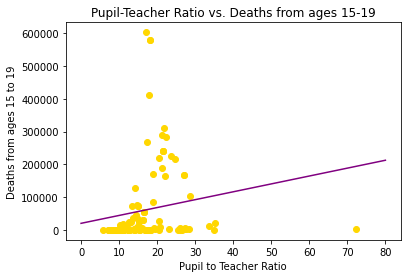

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.title("Pupil-Teacher Ratio vs. Deaths from ages 15-19")
plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("Deaths from ages 15 to 19")

x = np.array(ratio_and_death[pupil_ratio])
y = np.array(ratio_and_death[death_15_19])
plt.scatter(x, y, color = "gold")


poly_fit = np.poly1d(np.polyfit(x, y, 1))
line = np.linspace(0, 80, 70000)
plt.plot(line, poly_fit(line), color = "purple")

### We will find the correlation between pupil-teacher ratio (secondary) and number of deaths from ages 15-19. 

In [9]:
p = df[pupil_ratio]
d = df[death_15_19]
p.corr(d)

0.16519731612262925

## Conclusion

### We predicted that the number of deaths from ages 15-19 will be higher when the pupil-teacher ratio is high. 
### As we can see from the scatterplot, regression line, and the correlation of 0.165197, this prediction was incorrect. 